# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

# Read and clean data

## Wage

**Read the Lonniveau data** in ``LIGELB1.xlsx`` and **clean it** removing and renaming columns:

In [2]:
# a. load
wage = pd.read_excel('LIGELB1.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
wage.drop(drop_these, axis=1, inplace=True)

# c. rename columns
wage.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset now looks like this:

In [3]:
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Remove all rows which are not municipalities**:

In [4]:
wage = dataproject.only_keep_municipalities(wage)
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Convert the dataset to long format**:

In [5]:
# a. rename year columns
mydict = {str(i):f'wage{i}' for i in range(2009,2019)}
wage.rename(columns = mydict, inplace=True)

# b. convert to long
wage_long = pd.wide_to_long(wage, stubnames='wage', i='municipality', j='year').reset_index()

# c. show
wage_long.head()

,municipality,year,wage
0,Hele landet,2009,35734
1,København,2009,36607
2,Frederiksberg,2009,41119
3,Dragør,2009,43215
4,Tårnby,2009,36147


## Gini

In [6]:
# a. load
gini = pd.read_excel('IFOR41.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0']
gini.drop(drop_these, axis=1, inplace=True)

# c. rename columns
gini.rename(columns = {'Unnamed: 1':'municipality'}, inplace=True)

In [7]:
gini.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


In [8]:
gini = dataproject.only_keep_municipalities(gini)
gini.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


**Convert the dataset to long format**:

In [9]:
# a. rename year columns
mydict1 = {str(k):f'gini{k}' for k in range(2009,2020)}
gini.rename(columns = mydict1, inplace=True)

# b. convert to long
gini_long = pd.wide_to_long(gini, stubnames='gini', i='municipality', j='year').reset_index()

# c. show
gini_long.head()

,municipality,year,gini
0,Hele landet,2009,26.74
1,København,2009,29.38
2,Frederiksberg,2009,30.33
3,Dragør,2009,26.25
4,Tårnby,2009,21.40


## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [10]:
def plot_wage_gini(wage,gini,dataset,municipality): 
    
    if dataset == 'wage':
        df = wage
        y = 'wage'
    else:
        df = gini
        y = 'gini'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

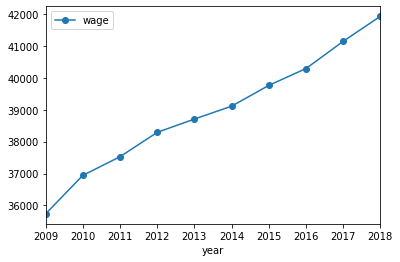

In [11]:
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. This means removing Christiansø from our datasets, so they represent the same municpalities and all of Denmark.

In [12]:
print(len(gini_long.year.unique()))
print(len(wage_long.year.unique()))
print(len(gini_long.municipality.unique()))
print(len(wage_long.municipality.unique()))

#We merge the two datasets:
merged = pd.merge(gini_long, wage_long ,how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

10
10
99
99
Number of municipalities = 99
Number of years          = 10


In [13]:
print(f'Years in gini: {gini_long.year.unique()}')
print(f'Municipalities in gini_long = {len(gini_long.municipality.unique())}')
print(f'Years in wage: {wage_long.year.unique()}')
print(f'Municipalities in wage = {len(wage_long.municipality.unique())}')


Years in gini: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Municipalities in gini_long = 99
Years in wage: [2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Municipalities in wage = 99


In [14]:
joinboth = pd.merge(gini_long, wage_long,how='inner',on=['municipality','year'])
joinboth.head()

,municipality,year,gini,wage
0,Hele landet,2009,26.74,35734
1,København,2009,29.38,36607
2,Frederiksberg,2009,30.33,41119
3,Dragør,2009,26.25,43215
4,Tårnby,2009,21.40,36147


In [15]:
# Group data by municipality and year
joinboth2 = joinboth.groupby(['municipality','year','gini','wage']).sum().reset_index()
joinboth2.head()

,municipality,year,gini,wage
0,Aabenraa,2009,25.57,33192
1,Aabenraa,2010,25.09,34119
2,Aabenraa,2011,25.01,34825
3,Aabenraa,2012,24.83,35338
4,Aabenraa,2013,25.36,35615


In [16]:
print(joinboth2.agg(['mean','std','max','min']).round(2))

municipality     year   gini      wage
max           Ærø  2018.00  47.77  60720.00
min      Aabenraa  2009.00  20.40  31438.00
mean          NaN  2013.50  25.80  38571.92
std           NaN     2.87   3.55   5076.73


In [17]:
print(joinboth2.groupby(['year']).agg(['mean','std','max','min']).round(2))

gini                          wage                       
       mean   std    max    min      mean      std    max    min
year                                                            
2009  25.28  3.24  42.42  20.40  35588.95  4090.75  50949  31438
2010  25.50  3.43  43.42  21.65  36769.74  4517.63  54630  31948
2011  25.48  3.27  42.83  20.94  37238.27  4699.84  54940  32292
2012  25.11  3.27  42.13  20.71  37945.55  4715.92  55481  32716
2013  25.50  3.43  43.39  21.51  38302.07  4833.02  56118  32864
2014  25.73  3.65  43.98  21.44  38685.46  4827.14  56279  33198
2015  26.04  3.91  47.77  22.03  39309.05  4881.91  57422  33836
2016  26.38  3.73  45.02  22.50  39824.34  5023.72  58411  34174
2017  26.58  3.74  45.44  21.63  40647.82  5147.41  59791  34563
2018  26.40  3.58  44.50  22.88  41407.98  5219.17  60720  35101


In [18]:
print(joinboth2.groupby(['municipality']).agg(['mean','std','max','min']).round(2))

year                     gini                         wage  \
                   mean   std   max   min   mean   std    max    min     mean   
municipality                                                                    
Aabenraa         2013.5  3.03  2018  2009  25.60  0.76  27.42  24.83  35671.2   
Aalborg          2013.5  3.03  2018  2009  27.31  1.02  28.70  25.72  37396.4   
Aarhus           2013.5  3.03  2018  2009  31.48  1.36  33.29  28.64  39497.7   
Albertslund      2013.5  3.03  2018  2009  25.14  0.46  25.68  23.99  37644.1   
Allerød          2013.5  3.03  2018  2009  25.24  0.63  26.34  24.23  49270.7   
...                 ...   ...   ...   ...    ...   ...    ...    ...      ...   
Vejle            2013.5  3.03  2018  2009  26.21  0.71  27.02  25.19  38435.7   
Vesthimmerlands  2013.5  3.03  2018  2009  24.79  1.34  28.33  23.94  33787.4   
Viborg           2013.5  3.03  2018  2009  24.74  0.63  25.84  23.81  36559.1   
Vordingborg      2013.5  3.03  2018  2009  24.8

In [19]:
print(joinboth2.groupby(['municipality','year']).agg(['mean','std','max','min']).round(2))
# Helt skidt her, mean max og min er det samme, men måske vi kan finde en anden måde hvis vi vil have kommunen med også

gini                     wage                  
                    mean std    max    min   mean std    max    min
municipality year                                                  
Aabenraa     2009  25.57 NaN  25.57  25.57  33192 NaN  33192  33192
             2010  25.09 NaN  25.09  25.09  34119 NaN  34119  34119
             2011  25.01 NaN  25.01  25.01  34825 NaN  34825  34825
             2012  24.83 NaN  24.83  24.83  35338 NaN  35338  35338
             2013  25.36 NaN  25.36  25.36  35615 NaN  35615  35615
...                  ...  ..    ...    ...    ...  ..    ...    ...
Ærø          2014  25.18 NaN  25.18  25.18  34926 NaN  34926  34926
             2015  26.34 NaN  26.34  26.34  35323 NaN  35323  35323
             2016  26.35 NaN  26.35  26.35  34371 NaN  34371  34371
             2017  25.24 NaN  25.24  25.24  35854 NaN  35854  35854
             2018  26.16 NaN  26.16  26.16  36566 NaN  36566  36566

[990 rows x 8 columns]


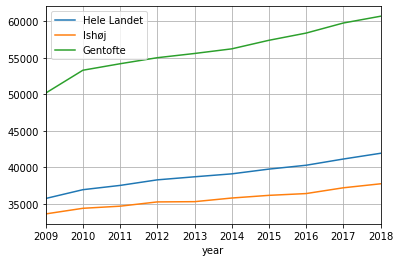

In [26]:
wage_hele_landet = wage_long.loc[wage_long['municipality'] == 'Hele landet', :]
wage_Ishøj = wage_long.loc[wage_long['municipality'] == 'Ishøj', :]
wage_Gentofte = wage_long.loc[wage_long['municipality'] == 'Gentofte', :]
wage_hele_landet.head(10)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
wage_hele_landet.plot(x='year',y='wage',ax=ax,label='Hele Landet')
wage_Ishøj.plot(x='year',y='wage',ax=ax,label='Ishøj')
wage_Gentofte.plot(x='year',y='wage',ax=ax,label='Gentofte')

ax.grid(True)
ax.legend(frameon=True)
ax.legend(frameon=True)

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [21]:
print(merged.groupby('year').agg(['mean','std','max','min']).round(2))
print(gini_long.groupby('year').agg(['mean','std','max','min']).round(2))
print(gini_long)
print(wage_long)
print(merged.groupby('year').agg(['mean']))

gini                    
       mean   std    max    min
year                           
2009  25.28  3.24  42.42  20.40
2010  25.50  3.43  43.42  21.65
2011  25.48  3.27  42.83  20.94
2012  25.11  3.27  42.13  20.71
2013  25.50  3.43  43.39  21.51
2014  25.73  3.65  43.98  21.44
2015  26.04  3.91  47.77  22.03
2016  26.38  3.73  45.02  22.50
2017  26.58  3.74  45.44  21.63
2018  26.40  3.58  44.50  22.88
       gini                    
       mean   std    max    min
year                           
2009  25.28  3.24  42.42  20.40
2010  25.50  3.43  43.42  21.65
2011  25.48  3.27  42.83  20.94
2012  25.11  3.27  42.13  20.71
2013  25.50  3.43  43.39  21.51
2014  25.73  3.65  43.98  21.44
2015  26.04  3.91  47.77  22.03
2016  26.38  3.73  45.02  22.50
2017  26.58  3.74  45.44  21.63
2018  26.40  3.58  44.50  22.88
        municipality  year   gini
0        Hele landet  2009  26.74
1          København  2009  29.38
2      Frederiksberg  2009  30.33
3             Dragør  2009  26.25
4    

In [22]:
print(merged.groupby('year').agg(['mean','std','max','min']).round(2))


gini                    
       mean   std    max    min
year                           
2009  25.28  3.24  42.42  20.40
2010  25.50  3.43  43.42  21.65
2011  25.48  3.27  42.83  20.94
2012  25.11  3.27  42.13  20.71
2013  25.50  3.43  43.39  21.51
2014  25.73  3.65  43.98  21.44
2015  26.04  3.91  47.77  22.03
2016  26.38  3.73  45.02  22.50
2017  26.58  3.74  45.44  21.63
2018  26.40  3.58  44.50  22.88


ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.